# Bisection algorithm 

First we should import the required packages:

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from scipy import misc
from sympy import *

Now, we will try to find the maximum point in the function $g(x)$.So, first we need to compute the derivation of this function. Then, we can find the maximum with implying bisection method on $g’(x)$ function.

In [2]:
t = Symbol('t')
g = (sym.log(t))/(1+t)

Now, we can compute $g'(x)$:

In [3]:
g_prime = g.diff(t)

In [4]:
g = lambdify(t, g)
g_prime = lambdify(t, g_prime)

In [5]:
g(3)

0.27465307216702745

In [6]:
g_prime(3)

0.014670065291576467

We will write a code to calculate the root of $g'(x)$ by bisection method:

In [7]:
def bisection(f, x_L, x_R, eps, return_x_list=False):
    f_L = f(x_L)
    if f_L*f(x_R) > 0:
        print ('Error! Function does not have opposite \
                 signs at interval endpoints!')
        sys.exit(1)
    x_M = float(x_L + x_R)/2.0
    f_M = f(x_M)
    iteration_counter = 1
    if return_x_list:
        x_list = []

    while abs(f_M) > eps:
        if f_L*f_M > 0:   # i.e. same sign
            x_L = x_M
            f_L = f_M
        else:
            x_R = x_M
        x_M = float(x_L + x_R)/2
        f_M = f(x_M)
        iteration_counter += 1
        if return_x_list:
            x_list.append(x_M)
    if return_x_list:
        return x_list, iteration_counter
    else:
        return x_M, iteration_counter

This will be the results of my code:

In [8]:
solution, no_iterations = bisection(g_prime, 1, 5, eps=1.0e-6)
print ('Number of function calls: %d' % (1 + 2*no_iterations))
print ('A solution is: %f' % (solution))

Number of function calls: 29
A solution is: 3.591064


In addition, the SciPy can find the root by bisection method. We can compare the results of our code with SciPy outputs:

In [9]:
from scipy.optimize import bisect

sol = bisect(g_prime, 1, 5, xtol=1e-6)

print("The root x is approximately x=%14.12g,\n"
      "the error is less than 1e-6." % (sol))

The root x is approximately x= 3.59112071991,
the error is less than 1e-6.


Now, we will plot the function $g(x)$ in the Example 2.1

In [10]:
def g(x):
    return (np.log(x))/(1+x)

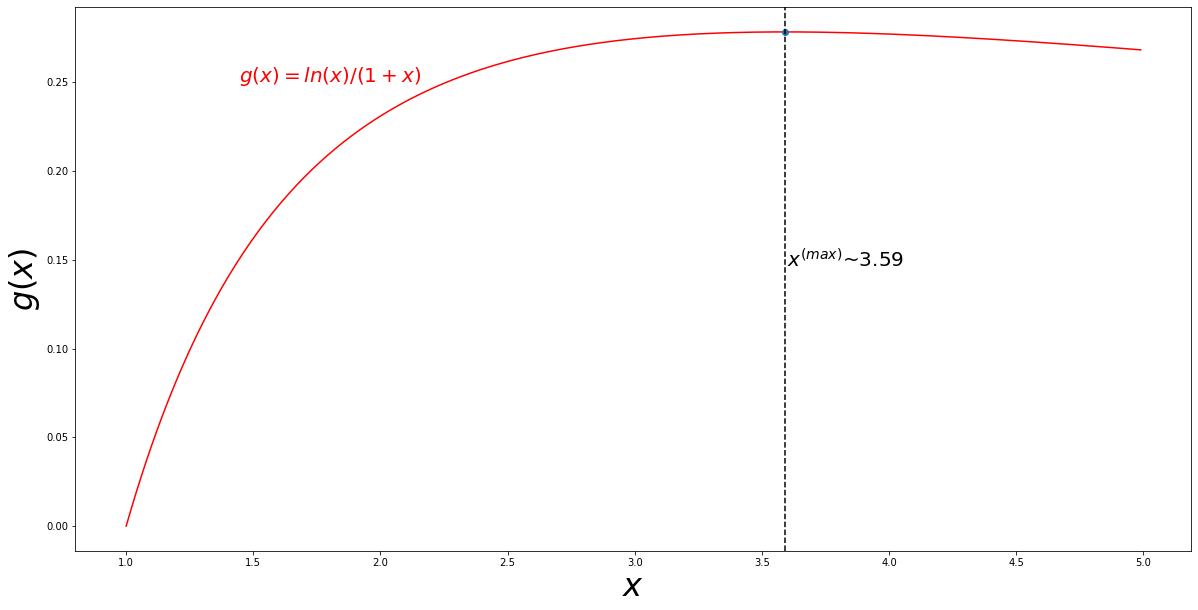

In [11]:
x = np.arange(1.0, 5.0, 0.01)

y = g(x)
plt.figure(figsize=(20,10))
plt.plot(x, y,'r-')
plt.xlabel('$x$',fontsize=32)
plt.ylabel('$g(x)$',fontsize=32)
n_max = y.argmax()
plt.plot(x[n_max], y[n_max],'o')
plt.axvline(x=x[n_max],color='k', linestyle='--')
text(3.6, 0.15,
     r'$x^{(max)}$~3.59', verticalalignment='center',
     fontsize=20,color='k')
text(1.8, 0.25,
     r'$g(x)=ln (x)/(1+x)$', horizontalalignment='center',
     fontsize=20,color='red')
plt.rc('xtick',labelsize=24)
plt.rc('ytick',labelsize=24)
plt.show()

Now, we can plot the $g'(x)$ and $x^*$ as root. We will show the bisection method steps schematically.

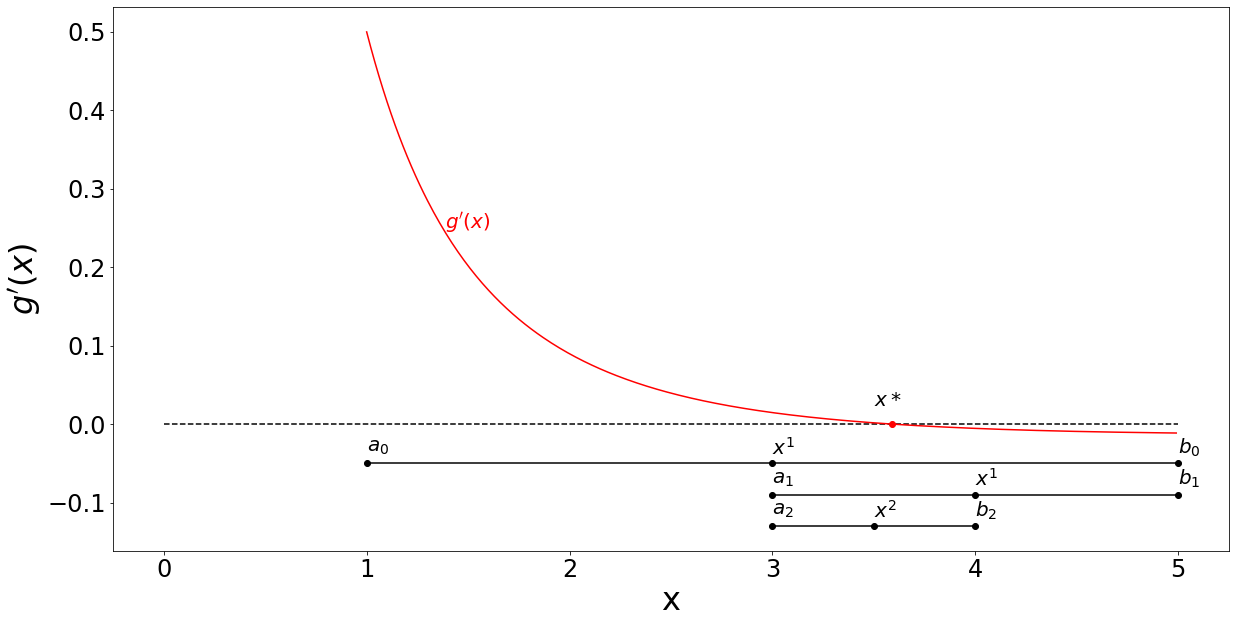

In [12]:
z = np.arange(1.0, 5.0, 0.01)

v = g_prime(z)
plt.figure(figsize=(20,10))
plt.plot(z, v,'r-')
plt.xlabel('x',fontsize=32)
plt.ylabel('$g^\prime(x)$',fontsize=32)
plt.hlines(y=0,xmin=0,xmax=5,color='k', linestyle='--')
plt.plot(1, -0.05, 'ok')
plt.plot(5, -0.05, 'ok')
plt.plot(3, -0.05, 'ok')
text(1, -0.03,
     r'$a_0$', verticalalignment='center',
     fontsize=20,color='k')
text(5, -0.03,
     r'$b_0$', verticalalignment='center',
     fontsize=20,color='k')
text(3, -0.03,
     r'$x^1$', verticalalignment='center',
     fontsize=20,color='k')
plt.hlines(y=-0.05,xmin=1,xmax=5,color='k', linestyle='-')

plt.plot(3, -0.09, 'ok')
plt.plot(5, -0.09, 'ok')
plt.plot(4, -0.09, 'ok')
text(3, -0.07,
     r'$a_1$', verticalalignment='center',
     fontsize=20,color='k')
text(5, -0.07,
     r'$b_1$', verticalalignment='center',
     fontsize=20,color='k')
text(4, -0.07,
     r'$x^1$', verticalalignment='center',
     fontsize=20,color='k')
plt.hlines(y=-0.09,xmin=3,xmax=5,color='k', linestyle='-')

plt.plot(3, -0.13, 'ok')
plt.plot(4, -0.13, 'ok')
plt.plot(3.5, -0.13, 'ok')
text(3, -0.11,
     r'$a_2$', verticalalignment='center',
     fontsize=20,color='k')
text(4, -0.11,
     r'$b_2$', verticalalignment='center',
     fontsize=20,color='k')
text(3.5, -0.11,
     r'$x^2$', verticalalignment='center',
     fontsize=20,color='k')
plt.hlines(y=-0.13,xmin=3,xmax=4,color='k', linestyle='-')

plt.plot(sol, 0, 'ro')
text(3.5, 0.03,
     r'$x*$', verticalalignment='center',
     fontsize=20,color='k')
text(1.5, 0.25,
     r'$g^\prime(x)$', horizontalalignment='center',
     fontsize=20,color='red')
plt.rc('xtick',labelsize=24)
plt.rc('ytick',labelsize=24)
plt.show()